In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
calories = pd.read_csv('/content/calories.csv')
excercise = pd.read_csv('/content/exercise.csv')

In [3]:
calories.head()


,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
excercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [5]:
df = pd.concat([excercise,calories['Calories']],axis = 1)

In [6]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [7]:
df.shape

(15000, 9)

In [8]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [9]:
correlation = df.corr()
correlation

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Age,-0.001827,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


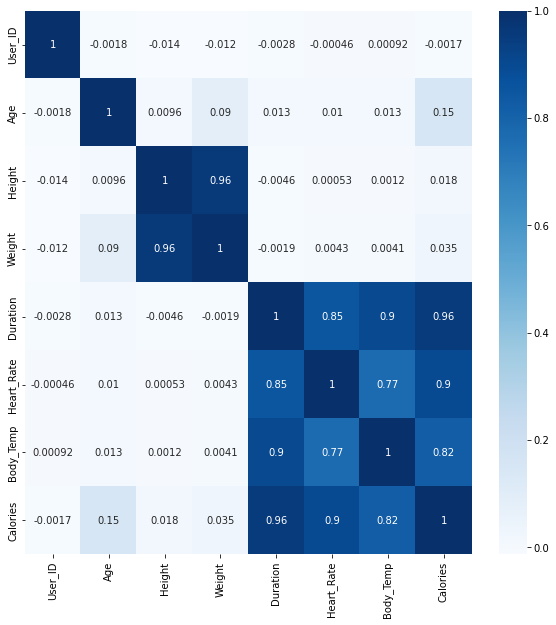

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cmap="Blues",annot=True)

In [11]:
df = df.replace({"Gender":{'male':0 , 'female':1}})

In [12]:
df

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,0,78,193.0,97.0,2.0,84.0,38.3,11.0


Seprate data

In [13]:
X = df.drop(columns=["User_ID","Calories"])
y = df.iloc[:,-1]

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

split


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
scaler = StandardScaler()

In [17]:
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler=scaler.transform(X_test)



```
# This is formatted as code
```



In [18]:
models = {
    "linear_regression":LinearRegression(),
    "ridge_regression":Ridge(alpha=[1,2,3,4,5,6,7,8,9,10]),
    "logistic_regression":LogisticRegression(),
    "decision_tree":DecisionTreeRegressor(),
    "random_forest":RandomForestRegressor(),
    # "xgboost":XGBRegressor()
}


Training multiple model 

In [19]:
param = {
    'alpha':[1e-15,1e-3,1e-1,1,5,10,40,50]
}
ridge_reg = GridSearchCV(Ridge(),param,cv=5)
ridge_train = ridge_reg.fit(X_train_scaler,y_train)
ridge_pred = ridge_reg.predict(X_test)
test_accuracy = mean_absolute_error(y_test,ridge_pred)
test_accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Ridge was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


2407.057357408527

In [35]:
def print_score_1(train_accuracy,test_accuracy,train_mae,test_mae):
  print("="*35)

  print(list(models.keys())[i])

  print("Model performance for Traning score")
  print("Accuracy: {:.4f}".format(train_accuracy))
  print("Mean absolute error: {:.4f}".format(train_mae))
  
  print("-"*35)

  print("Model performance for Testing score")
  print("Accuracy: {:.4f}".format(test_accuracy))
  print("Mean absolute error: {:.4f}".format(test_mae))
  print("="*35)
  print("\n")

def print_score_2(model_train_accuracy,model_train_f1,model_train_precision,model_train_recall,model_test_accuracy,model_test_f1,model_test_precision,model_test_recall):
  print("="*35)

  print(list(models.keys())[i])

  print("Model performance for Traning score")
  print("Accuracy: {:.4f}".format(model_train_accuracy))
  print("F1 Score: {:.4f}".format(model_train_f1))
  print("Precission: {:.4f}".format(model_train_precision))
  print("Recall: {:.4f}".format(model_train_recall))
  # print("Roc Auc score: {:.4f}".format(model_train_roc_auc))

  print("-"*35)

  print("Model performance for test score")
  print("Accuracy: {:.4f}".format(model_test_accuracy))
  print("F1 Score: {:.4f}".format(model_test_f1))
  print("Precission: {:.4f}".format(model_test_precision))
  print("Recall: {:.4f}".format(model_test_recall))
  # print("Roc Auc score: {:.4f}".format(model_test_roc_auc))

  print("="*35)
  print("\n")

# for i in range(len(list(models))):
#   model = list(models.values())[i]
#   if list(models.keys())[i] == 'linear_regression' or list(models.keys())[i] == 'ridge_regression':
#     model.fit(X_train_scaler,y_train) 
    
#     y_train_predict = model.predict(X_train_scaler)
#     y_test_predict = model.predict(X_test)

#     train_accuracy = r2_score(y_train , y_train_predict)
#     test_accuracy = r2_score(y_test , y_test_predict)

#     train_mae = mean_absolute_error(y_train , y_train_predict)
#     test_mae = mean_absolute_error(y_test , y_test_predict)
#     model.get_params(deep=True)
#     # printing the values
#     print_values = print_score_1(train_accuracy=train_accuracy,test_accuracy=test_accuracy,train_mae=train_mae,test_mae=test_mae)
    
  # else:
  #   model.fit(X_train , y_train)
  #   y_train_predict = model.predict(X_train)
  #   y_test_predict = model.predict(X_test)
  #   try:
  #   # Train
  #     model_train_accuracy = accuracy_score(y_train , y_train_predict)
  #     model_train_f1 = f1_score(y_train , y_train_predict , average="weighted")
  #     # model_train_precision = precision_score(y_train , y_train_predict, average="weighted")
  #     # model_train_recall = recall_score(y_train , y_train_predict, average="weighted")
  #     # model_train_roc_auc = roc_auc_score(y_train , y_train_predict, average="weighted")

  #     # Test
  #     model_test_accuracy = accuracy_score(y_test , y_test_predict)
  #     model_test_f1 = f1_score(y_test , y_test_predict , average="weighted")
  #     # model_test_precision = precision_score(y_test , y_test_predict, average="weighted")
  #     # model_test_recall = recall_score(y_test , y_test_predict, average="weighted")
  #     # model_test_roc_auc = roc_auc_score(y_test , y_test_predict, average="weighted")

  #     # printing the values
  #     print_values = print_score_2(model_train_accuracy,model_train_f1,model_train_precision,model_train_recall,model_test_accuracy,model_test_f1,model_test_precision,model_test_recall)
      
  #   except Exception as err:
  #     print("-",err)

In [ ]:
print("s"*1)

s


Ridge Regression

In [37]:
param = {'alpha':[1e-15,1e-3,1e-1,1,5,10,40,50]}
ridge_reg = GridSearchCV(Ridge(), param, scoring='neg_mean_absolute_error',cv=5, n_jobs=-1)
ridge_train = ridge_reg.fit(X_train_scaler,y_train)
ridge_pred = ridge_reg.predict(X_test)
test_accuracy = mean_squared_error(y_test,ridge_pred)
print(f'mean square error :- {test_accuracy}')

mean square error :- 6231321.237790514


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Ridge was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


XGBoost Regressor

In [ ]:
from sklearn import metrics
model = XGBRegressor()
model.fit(X_train,y_train)
print("\n")
print("="*25)
pred = model.predict(X_test)
print("pred -->",pred)
print("="*25)
mse = metrics.mean_squared_error(y_test , pred)
print("mse -->",mse)

[13:45:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


pred --> [171.48285  193.14943   50.881374 ... 124.34918   19.38314  212.77148 ]
mse --> 12.49214961432602


Hyper parameter tuning for Random Forest

https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/

In [36]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [3,10,15],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2, 4, 5],
    'min_samples_split': [2, 5, 10, 12],
    'n_estimators': [10,20]
}
random_forest = RandomForestRegressor()
grid_search =  GridSearchCV(estimator = random_forest, param_grid = param_grid, cv = 3, n_jobs = -1)
grid_search.fit(X_train,y_train)
predict = grid_search.predict(X_test)

print("="*25)

mse = mean_squared_error(y_test , predict)
print(f'Mean Squared Error :- {mse}')

Mean Squared Error :- 23.362719030484715
